In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 97% 144M/149M [00:00<00:00, 171MB/s]
100% 149M/149M [00:00<00:00, 186MB/s]


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip "/content/brain-tumor-mri-dataset.zip" -d "/content/uncompressed"

Streaming output truncated to the last 5000 lines.
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/uncompressed/Training/glioma/Tr-gl_0726.jpg

In [ ]:
data_train = '/content/uncompressed/Training'
data_test = '/content/uncompressed/Testing'

In [ ]:
import pathlib
data_train = pathlib.Path(data_train)
data_test = pathlib.Path(data_test)
data_train
data_test

PosixPath('/content/uncompressed/Testing')

In [ ]:
list(data_train.glob('*/*.jpg'))[:5]

[PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_0790.jpg'),
 PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_1262.jpg'),
 PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_1181.jpg'),
 PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_1065.jpg'),
 PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_1125.jpg')]

In [ ]:
list(data_train.glob('*/*.jpg'))[:5]

[PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_0790.jpg'),
 PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_1262.jpg'),
 PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_1181.jpg'),
 PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_1065.jpg'),
 PosixPath('/content/uncompressed/Training/pituitary/Tr-pi_1125.jpg')]

In [ ]:
image_count = len(list(data_train.glob('*/*.jpg')))
print(image_count)

5712


In [ ]:
glioma = list(data_train.glob('glioma/*'))
glioma[:5]

[PosixPath('/content/uncompressed/Training/glioma/Tr-gl_0682.jpg'),
 PosixPath('/content/uncompressed/Training/glioma/Tr-gl_0917.jpg'),
 PosixPath('/content/uncompressed/Training/glioma/Tr-gl_1185.jpg'),
 PosixPath('/content/uncompressed/Training/glioma/Tr-gl_1233.jpg'),
 PosixPath('/content/uncompressed/Training/glioma/Tr-gl_0472.jpg')]

In [ ]:
glioma_count = len(glioma)
print(glioma_count)

1321


In [ ]:
print(glioma[0])

/content/uncompressed/Training/glioma/Tr-gl_0682.jpg


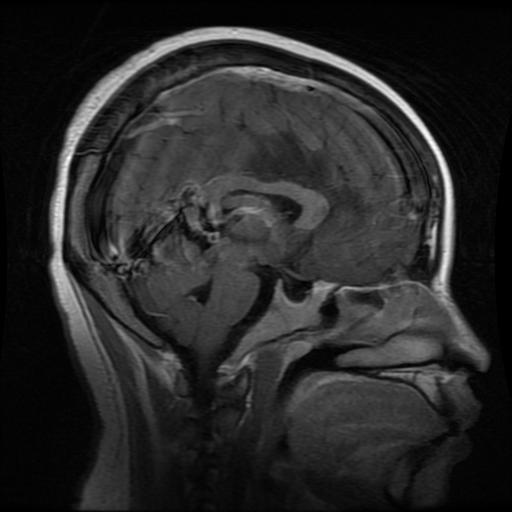

In [ ]:
PIL.Image.open(str(glioma[3]))

In [ ]:
Brain_tumor_images_dict = {
    'glioma': list(data_train.glob('glioma/*.jpg')),
    'meningioma': list(data_train.glob('meningioma/*.jpg')),
    'pituitary': list(data_train.glob('pituitary/*.jpg')),
}

In [ ]:
Brain_tumor_labels_dict = {
    'glioma': 0,
    'meningioma': 1,
    'pituitary': 2,
}

In [ ]:
Brain_tumor_images_dict['meningioma'][:5]

[PosixPath('/content/uncompressed/Training/meningioma/Tr-me_0066.jpg'),
 PosixPath('/content/uncompressed/Training/meningioma/Tr-me_0690.jpg'),
 PosixPath('/content/uncompressed/Training/meningioma/Tr-me_0408.jpg'),
 PosixPath('/content/uncompressed/Training/meningioma/Tr-me_0539.jpg'),
 PosixPath('/content/uncompressed/Training/meningioma/Tr-me_1195.jpg')]

In [ ]:
x, y = [], []
for Tumor_name, images in Brain_tumor_images_dict.items():
    for image in images:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img, (100, 100))
      x.append(resized_img)
      y.append(Brain_tumor_labels_dict[Tumor_name])

In [ ]:
x =np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
num_classes = 3

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(optimizer ='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


97/97 [==============================] - 31s 304ms/step - loss: 0.6889 - accuracy: 0.6774
Epoch 2/10
97/97 [==============================] - 30s 306ms/step - loss: 0.4154 - accuracy: 0.8286
Epoch 3/10
97/97 [==============================] - 31s 323ms/step - loss: 0.3217 - accuracy: 0.8707
Epoch 4/10
97/97 [==============================] - 29s 302ms/step - loss: 0.2219 - accuracy: 0.9112
Epoch 5/10
97/97 [==============================] - 28s 294ms/step - loss: 0.1835 - accuracy: 0.9336
Epoch 6/10
97/97 [==============================] - 28s 290ms/step - loss: 0.1301 - accuracy: 0.9530
Epoch 7/10
97/97 [==============================] - 29s 301ms/step - loss: 0.0920 - accuracy: 0.9650
Epoch 8/10
97/97 [==============================] - 30s 308ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 9/10
97/97 [==============================] - 30s 307ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 10/10
97/97 [==============================] - 30s 309ms/step - loss: 0.0212 - accuracy: 0.9942


In [ ]:
model.evaluate(x_test_scaled, y_test)

33/33 [==============================] - 6s 143ms/step - loss: 0.2076 - accuracy: 0.9485


[0.20759159326553345, 0.9485436677932739]

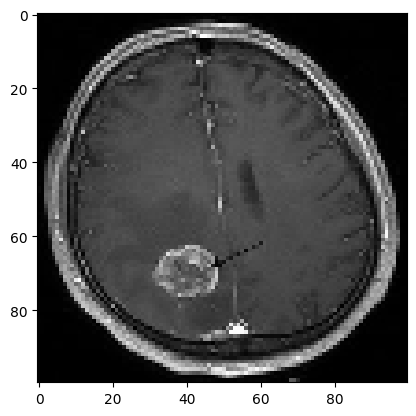

In [ ]:
img= cv2.imread("/220px-Hirnmetastase_MRT-T1_KM.jpg")
rez_img= cv2.resize(img, (100,100))
plt.imshow(rez_img)
plt.show()
rez_img= rez_img.reshape(1,100,100,3)

In [ ]:
model.predict(rez_img)

1/1 [==============================] - 0s 361ms/step


array([[0., 1., 0.]], dtype=float32)